# Legally Operating Businesses in NYC Dataset
## Nick Kim (nsk9rk@virginia.edu)
## December 2019

1. This jupyter notebook includes all data input, data cleaning, EDA/visualization generation, and KDE/spatial analysis. 


## 1. Data Read-In and Processing

In [152]:
%matplotlib inline
import json  
import pandas as pd  
from pandas.io.json import json_normalize 
import seaborn as sns
import missingno as msno 
import matplotlib.pyplot as plt

In [2]:
with open('./LegallyOperatingBusinessesNYC.json') as f: 
    d = json.load(f) 

In [109]:
# put the json file into a pandas dataframe with max_level indicating depth of node exploration
nyc_data = json_normalize(d,max_level=0) 



2

In [110]:
nyc_data.columns

Index(['meta', 'data'], dtype='object')

In [113]:
nyc_data.head()

,meta,data
0,"{'view': {'id': 'w7w3-xahh', 'name': 'Legally ...","[[row-drwb.w83b~kfm4, 00000000-0000-0000-7726-..."


In [130]:
json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0)

,id,name,dataTypeName,fieldName,position,renderTypeName,format,flags,description,tableColumnId,width,cachedContents,subColumnTypes,computationStrategy
0,-1,sid,meta_data,:sid,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
1,-1,id,meta_data,:id,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
2,-1,position,meta_data,:position,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
3,-1,created_at,meta_data,:created_at,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
4,-1,created_meta,meta_data,:created_meta,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
5,-1,updated_at,meta_data,:updated_at,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
6,-1,updated_meta,meta_data,:updated_meta,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
7,-1,meta,meta_data,:meta,0,meta_data,{},[hidden],NaN,NaN,NaN,NaN,NaN,NaN
8,351473351,DCA License Number,text,license_nbr,1,text,{'align': 'left'},NaN,An identification number issued to businesses/...,26157789.0,188.0,"{'largest': '2091334-DCA', 'non_null': 197737,...",NaN,NaN
9,351473352,License Type,text,license_type,2,text,{'align': 'left'},NaN,DCA offers two license types:\nBusiness. Licen...,26157790.0,147.0,"{'largest': 'Individual', 'non_null': 197737, ...",NaN,NaN


In [147]:
json_normalize(d, record_path=['meta','view','columns'])

,id,name,dataTypeName,fieldName,position,renderTypeName,flags,description,tableColumnId,width,...,format.align,format.view,format.precisionStyle,format.noCommas,format.displayStyle,subColumnTypes,computationStrategy.source_columns,computationStrategy.type,computationStrategy.parameters.region,computationStrategy.parameters.primary_key
0,-1,sid,meta_data,:sid,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,id,meta_data,:id,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,position,meta_data,:position,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1,created_at,meta_data,:created_at,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1,created_meta,meta_data,:created_meta,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-1,updated_at,meta_data,:updated_at,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1,updated_meta,meta_data,:updated_meta,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-1,meta,meta_data,:meta,0,meta_data,[hidden],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,351473351,DCA License Number,text,license_nbr,1,text,NaN,An identification number issued to businesses/...,26157789.0,188.0,...,left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,351473352,License Type,text,license_type,2,text,NaN,DCA offers two license types:\nBusiness. Licen...,26157790.0,147.0,...,left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identify the field names from 'columns' node that correspond to the information stored under 'data' 

In [120]:
json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0).fieldName

0                            :sid
1                             :id
2                       :position
3                     :created_at
4                   :created_meta
5                     :updated_at
6                   :updated_meta
7                           :meta
8                     license_nbr
9                    license_type
10                   lic_expir_dd
11                 license_status
12          license_creation_date
13                       industry
14                  business_name
15                business_name_2
16               address_building
17            address_street_name
18          address_street_name_2
19                   address_city
20                  address_state
21                    address_zip
22                  contact_phone
23                address_borough
24                         detail
25                community_board
26               council_district
27                            bin
28                            bbl
29            

### Data is stored as a list of lists -- use pd.DataFrame.from_records() to read it into a dataframe

In [365]:
df = pd.DataFrame.from_records(nyc_data.data[0])

### Assign column header names using the field names from json metadata

In [382]:
print(json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0).name)

0                               sid
1                                id
2                          position
3                        created_at
4                      created_meta
5                        updated_at
6                      updated_meta
7                              meta
8                DCA License Number
9                      License Type
10          License Expiration Date
11                   License Status
12            License Creation Date
13                         Industry
14                    Business Name
15                  Business Name 2
16                 Address Building
17              Address Street Name
18    Secondary Address Street Name
19                     Address City
20                    Address State
21                      Address ZIP
22             Contact Phone Number
23                  Address Borough
24                     Borough Code
25                  Community Board
26                 Council District
27                          

In [386]:
print(json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0).fieldName)

0                            :sid
1                             :id
2                       :position
3                     :created_at
4                   :created_meta
5                     :updated_at
6                   :updated_meta
7                           :meta
8                     license_nbr
9                    license_type
10                   lic_expir_dd
11                 license_status
12          license_creation_date
13                       industry
14                  business_name
15                business_name_2
16               address_building
17            address_street_name
18          address_street_name_2
19                   address_city
20                  address_state
21                    address_zip
22                  contact_phone
23                address_borough
24                         detail
25                community_board
26               council_district
27                            bin
28                            bbl
29            

In [400]:
# Using name and field name to label features
columns_names = list(json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0).fieldName)[0:35] + \
                ['computed_zip_code',
                 'computed_community_districts',
                 'computed_borough_boundaries',
                 'computed_city_council_districts',
                 'computed_police_precincts']

In [402]:
# df.columns = json_normalize(nyc_data['meta'][0]['view']['columns'],max_level=0).fieldName
df.columns = columns_names

In [403]:
df.columns

Index([':sid', ':id', ':position', ':created_at', ':created_meta',
       ':updated_at', ':updated_meta', ':meta', 'license_nbr', 'license_type',
       'lic_expir_dd', 'license_status', 'license_creation_date', 'industry',
       'business_name', 'business_name_2', 'address_building',
       'address_street_name', 'address_street_name_2', 'address_city',
       'address_state', 'address_zip', 'contact_phone', 'address_borough',
       'detail', 'community_board', 'council_district', 'bin', 'bbl', 'nta',
       'census_tract', 'detail_2', 'longitude', 'latitude', 'location',
       'computed_zip_code', 'computed_community_districts',
       'computed_borough_boundaries', 'computed_city_council_districts',
       'computed_police_precincts'],
      dtype='object')

In [859]:
# detail column actually corresponds to borough code -- https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/nybb_metadata.pdf?ver=19d

# LIST OF VALUES
# VALUE 1
# DESCRIPTION Manhattan
# VALUE 2
# DESCRIPTION Bronx
# VALUE 3
# DESCRIPTION Brooklyn
# VALUE 4
# DESCRIPTION Queens
# VALUE 5
# DESCRIPTION Staten Island

In [404]:
df.head(10)

,:sid,:id,:position,:created_at,:created_meta,:updated_at,:updated_meta,:meta,license_nbr,license_type,...,census_tract,detail_2,longitude,latitude,location,computed_zip_code,computed_community_districts,computed_borough_boundaries,computed_city_council_districts,computed_police_precincts
0,row-drwb.w83b~kfm4,00000000-0000-0000-7726-FCF3F93E79A2,0,1544225035,None,1544225041,None,{ },2080385-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
1,row-sycj_89su.cx7c,00000000-0000-0000-4F98-69D68BC378E3,0,1538775757,None,1538775957,None,{ },2032192-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
2,row-9te3~kmpk~b5mc,00000000-0000-0000-540C-20F30CD4BCB3,0,1550875094,None,1550875098,None,{ },2064922-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
3,row-34yc~ydtn_b2b7,00000000-0000-0000-5F56-478B0AE35A6A,0,1539985092,None,1539985094,None,{ },1356487-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
4,row-ctbj~nd7d-yu7p,00000000-0000-0000-285B-F47CD6F5ABE9,0,1550875094,None,1550875098,None,{ },2082361-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
5,row-83x5-5z6p-jivn,00000000-0000-0000-68DA-14329AF9FEDF,0,1538775757,None,1538775957,None,{ },1165502-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None
6,row-ams3_h7qe.ynxv,00000000-0000-0000-C85F-52754FD88944,0,1522166142,None,1522166193,None,{ },1471197-DCA,Business,...,None,None,None,None,None,None,None,None,None,None
7,row-9ty5~ic85-fwva,00000000-0000-0000-48A0-16A324A7EF0D,0,1544225035,None,1544225041,None,{ },2038506-DCA,Business,...,None,None,None,None,None,None,None,None,None,None
8,row-9fsd-j3wx_nmpf,00000000-0000-0000-8675-8364A02E6333,0,1552085256,None,1552085264,None,{ },2052397-DCA,Business,...,None,None,None,None,None,None,None,None,None,None
9,row-u3ii-fwf3.6vv8,00000000-0000-0000-87C6-AA5ADA8FDA68,0,1544225035,None,1544225041,None,{ },2018846-DCA,Individual,...,None,None,None,None,None,None,None,None,None,None


# 2. Data Cleaning

Many of the columns require remapping of values or are completely null. Cleaning up a few of the features

### Characterize the Missingness of Data 

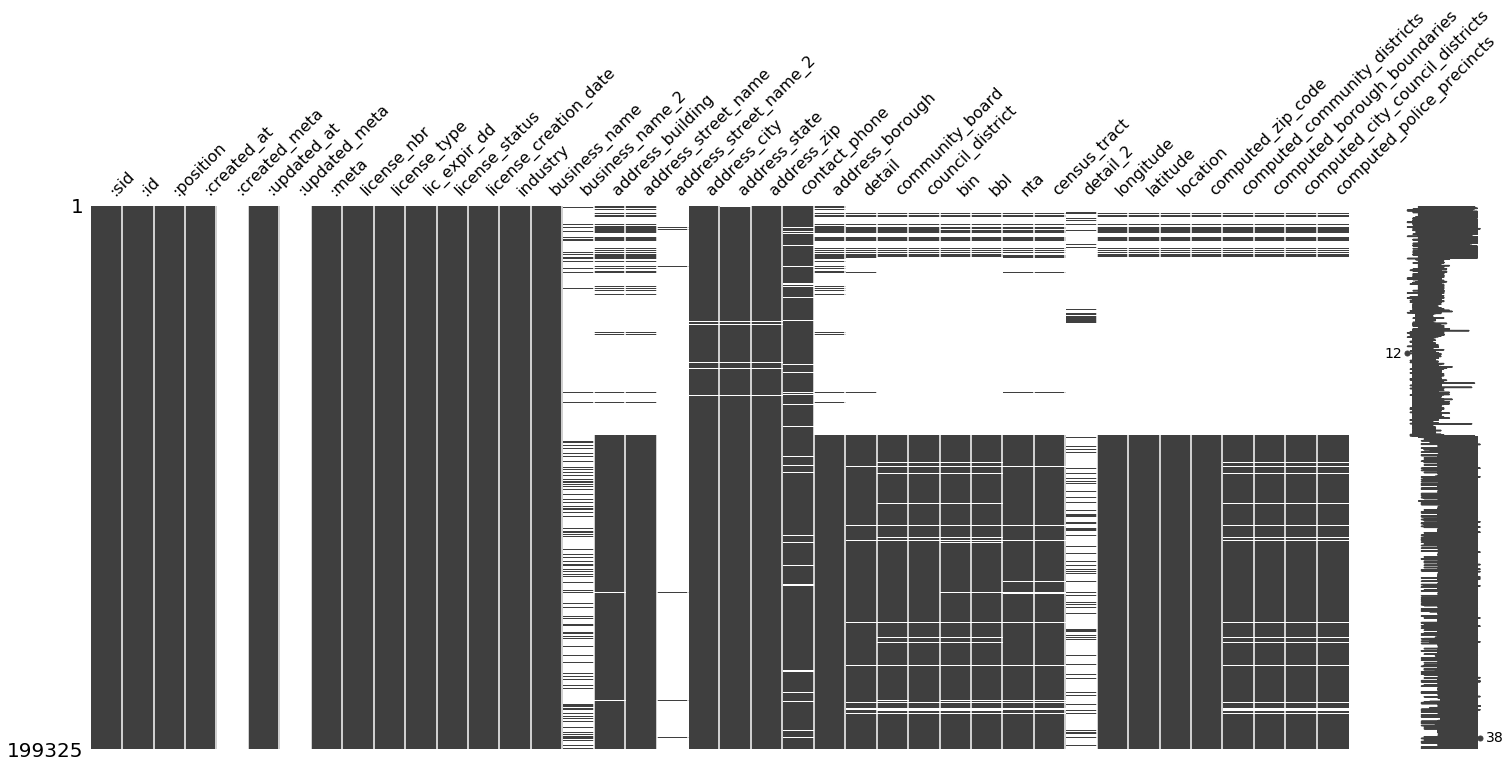

In [614]:
# Visualize missing values as a matrix 
msno.matrix(df) 

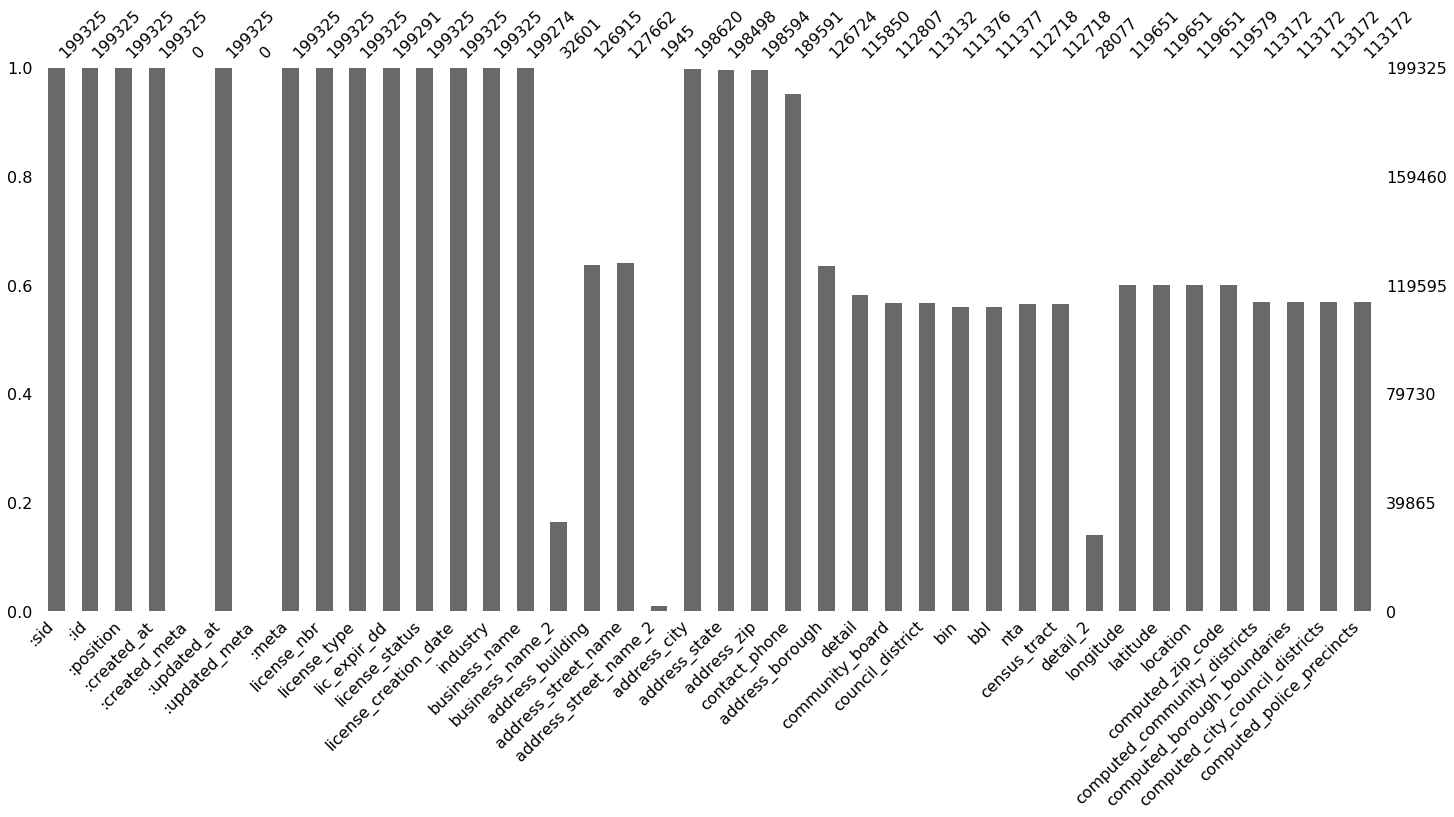

In [615]:
msno.bar(df) 


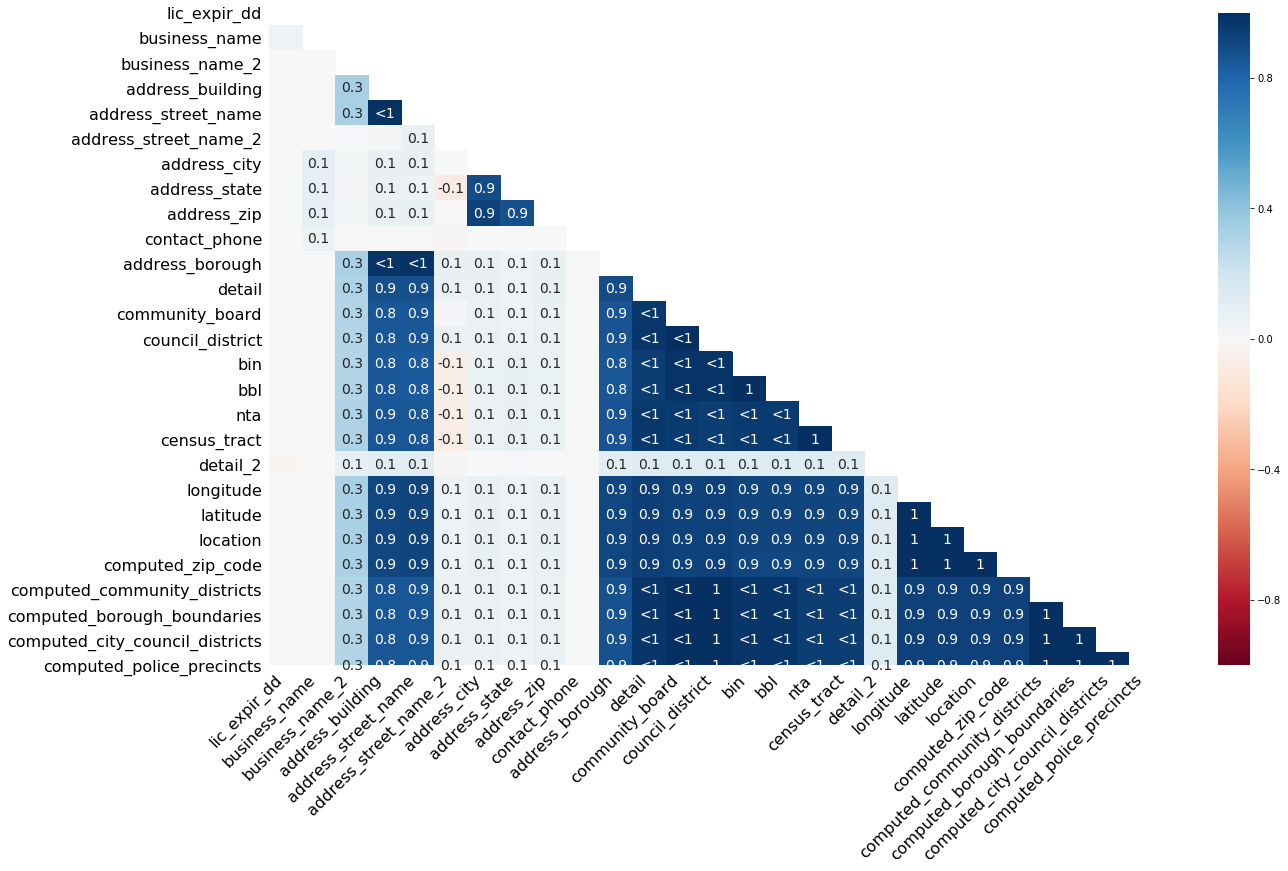

In [676]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df)
# plt.savefig("./heatmap_missing.jpg",bbox_inches='tight',dpi=100)
# plt.savefig('temp.pdf', format='pdf', bbox_inches='tight')


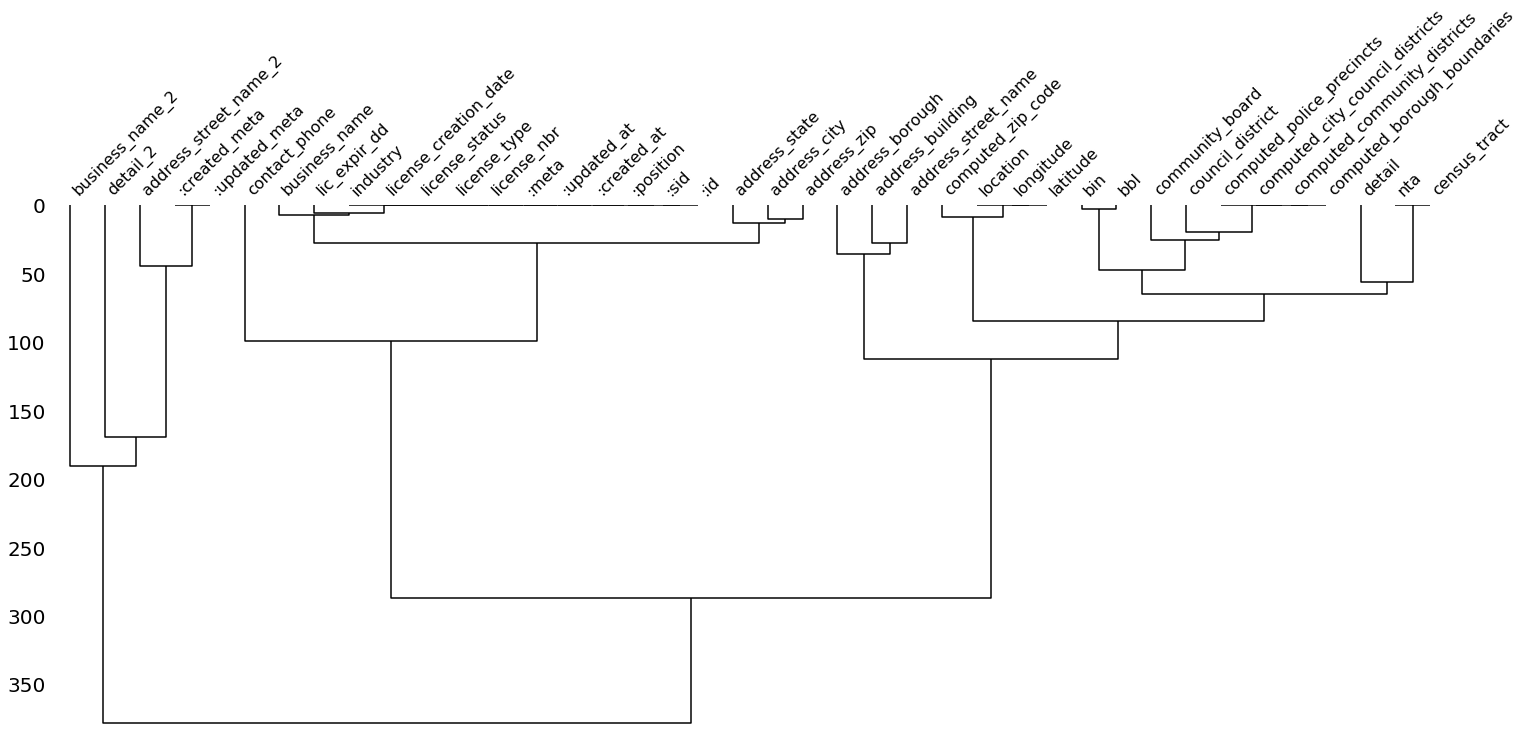

In [651]:
msno.dendrogram(df)

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199325 entries, 0 to 199324
Data columns (total 40 columns):
:sid                               199325 non-null object
:id                                199325 non-null object
:position                          199325 non-null int64
:created_at                        199325 non-null int64
:created_meta                      0 non-null object
:updated_at                        199325 non-null int64
:updated_meta                      0 non-null object
:meta                              199325 non-null object
license_nbr                        199325 non-null object
license_type                       199325 non-null object
lic_expir_dd                       199291 non-null object
license_status                     199325 non-null object
license_creation_date              199325 non-null object
industry                           199325 non-null object
business_name                      199274 non-null object
business_name_2                 

### There are 59 Unique Values for the industry column. Aggregate up and remap these to a lower number (20) using a remapping dictionary

In [726]:
df.industry.unique()

array(['Tow Truck Driver', 'Home Improvement Salesperson',
       'Debt Collection Agency', 'Home Improvement Contractor',
       'Locksmith', 'Pedicab Driver', 'General Vendor',
       'Process Server Individual', 'Electronics Store', 'Ticket Seller',
       'Sightseeing Guide', 'Auctioneer', 'Dealer In Products',
       'Electronic & Appliance Service', 'Secondhand Dealer - General',
       'Stoop Line Stand', 'Electronic Cigarette Dealer',
       'Tobacco Retail Dealer', 'Amusement Device Temporary',
       'Tow Truck Company', 'Laundries', 'Auction House Premises',
       'Scale Dealer Repairer', 'Newsstand', 'Pool or Billiard Room',
       'Horse Drawn Driver', 'Sidewalk Cafe', 'Process Serving Agency',
       'Parking Lot', 'Secondhand Dealer - Auto', 'Pedicab Business',
       'Amusement Device Portable', 'Locksmith Apprentice', 'Pawnbroker',
       'Garage', 'Laundry Jobber', 'Garage and Parking Lot',
       'Amusement Arcade', 'Employment Agency', 'Sightseeing Bus',
       'Ca

In [733]:
remap_industry = {
    'Tow Truck Driver':'auto_transport',
    'Home Improvement Salesperson':'home_improvement',
    'Debt Collection Agency':'financial_services',
    'Home Improvement Contractor':'home_improvement',
    'Locksmith':'repair_services',
    'Pedicab Driver':'auto_transport',
    'General Vendor':'general_vendor',
    'Process Server Individual':'process_serving_services',
    'Electronics Store':'entertainment',
    'Ticket Seller':'entertainment',
    'Sightseeing Guide':'tourism',
    'Auctioneer':'financial_services',
    'Dealer In Products':'general_vendor',
    'Electronic & Appliance Service':'repair_services',
    'Secondhand Dealer - General':'general_vendor',
    'Stoop Line Stand':'stoop_line_stand',
    'Electronic Cigarette Dealer':'tobacco_dealer',
    'Tobacco Retail Dealer':'tobacco_dealer',
    'Amusement Device Temporary':'entertainment',
    'Tow Truck Company':'auto_transport',
    'Laundries':'laundry',
    'Auction House Premises':'financial_services',
    'Scale Dealer Repairer':'repair_services',
    'Newsstand':'entertainment',
    'Pool or Billiard Room':'entertainment',
    'Horse Drawn Driver':'auto_transport',
    'Sidewalk Cafe':'culinary',
    'Process Serving Agency':'process_serving_services',
    'Parking Lot':'garage_parking',
    'Secondhand Dealer - Auto':'auto_dealer',
    'Pedicab Business':'auto_transport',
    'Amusement Device Portable':'entertainment',
    'Locksmith Apprentice':'repair_services',
    'Pawnbroker':'financial_services',
    'Garage':'garage_parking',
    'Laundry Jobber':'laundry',
    'Garage and Parking Lot':'garage_parking',
    'Amusement Arcade':'entertainment',
    'Employment Agency':'career_services',
    'Sightseeing Bus':'tourism',
    'Car Wash':'auto_service',
    'Laundry':'laundry',
    'Bingo Game Operator':'entertainment',
    'Amusement Device Permanent':'entertainment',
    'Booting Company':'garage_parking',
    'Games of Chance':'entertainment',
    'Storage Warehouse':'storage_service',
    'Scrap Metal Processor':'repair_services',
    'Tow Truck Exemption':'auto_transport',
    'Special Sale':'special_sale',
    'Horse Drawn Cab Owner':'auto_transport',
    'Ticket Seller Business':'entertainment',
    'Gaming Cafe':'culinary',
    'Motion Picture Projectionist':'entertainment',
    'Cabaret':'entertainment',
    'Catering Establishment':'culinary',
    'General Vendor Distributor':'general_vendor',
    'Commercial Lessor':'real_estate',
    'Secondhand Dealer - Firearms':'firearms_vendor'
}

In [734]:
df['industry_agg'] = df.industry.replace(remap_industry)

In [862]:
df.industry_agg.unique()

array(['auto_transport', 'home_improvement', 'financial_services',
       'repair_services', 'general_vendor', 'process_serving_services',
       'entertainment', 'tourism', 'stoop_line_stand', 'tobacco_dealer',
       'laundry', 'culinary', 'garage_parking', 'auto_dealer',
       'career_services', 'auto_service', 'storage_service',
       'special_sale', 'real_estate', 'firearms_vendor'], dtype=object)

### Remap values to remove duplicates in address_borough column

In [380]:
df.address_borough.unique()

array([None, 'Outside NYC', 'Brooklyn', 'Queens', 'Bronx', 'Manhattan',
       'Staten Island', 'MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX'],
      dtype=object)

In [ ]:
remap_borough = {
    'Manhattan':'MANHATTAN',
    'Queens':'QUEENS',
    'Brooklyn':'BROOKLYN',
    'Bronx':'BRONX',
    'Staten Island':'STATEN ISLAND',
    'Outside NYC':'OUTSIDE NYC'
}


In [415]:
df = df.replace({'address_borough':remap_borough})

### Cast date columns as datetime64

In [436]:
df['license_creation_date'] = df['license_creation_date'].astype("datetime64")
df["lic_expir_dd"] = df["lic_expir_dd"].astype("datetime64")

# 3. Basic Exploratory Data Analysis

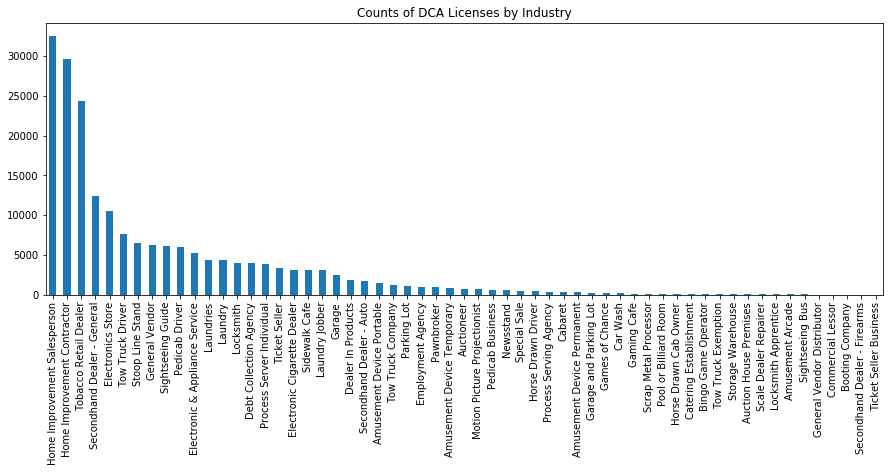

In [826]:
df.industry.value_counts().plot.bar(figsize=(15,5),title="Counts of DCA Licenses by Industry")

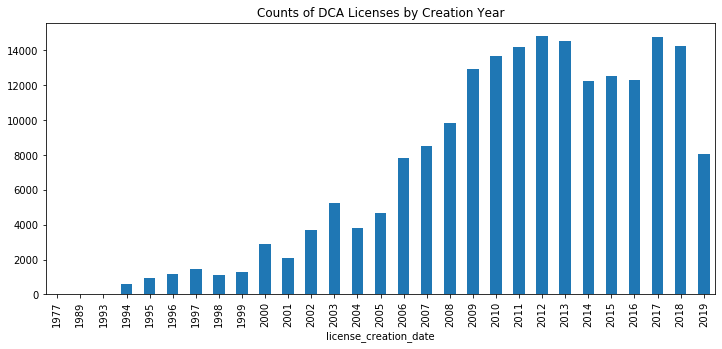

In [825]:
df.groupby(df["license_creation_date"].dt.year)['license_nbr'].count()\
    .plot(kind="bar",figsize=(12,5),title="Counts of DCA Licenses by Creation Year")


### There is a noticeable dip in 2019 license creation dates.

### Looking at the last couple hundred values in the license_creation_date column, it appears that the dataset is incomplete for calendar year 2019 -- there are only creation dates up until October 10th, 2019. 

In [445]:
list(df.license_creation_date.sort_values())[-200:]

[Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-03 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-04 00:00:00'),
 Timestamp('2019-10-

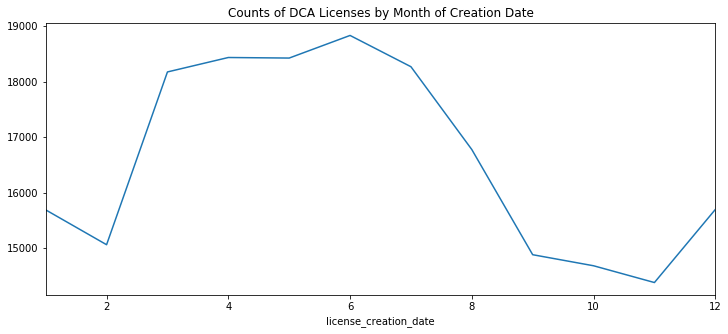

In [824]:
df.groupby(df["license_creation_date"].dt.month)['license_nbr'].count()\
    .plot(kind="line",figsize=(12,5),title="Counts of DCA Licenses by Month of Creation Date")

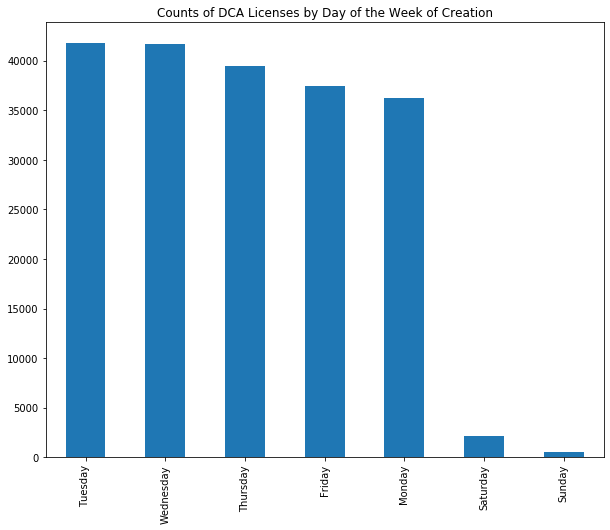

In [820]:
df['license_creation_date'].dt.day_name().value_counts()\
    .plot.bar(figsize=(10,8),title="Counts of DCA Licenses by Day of the Week of Creation")

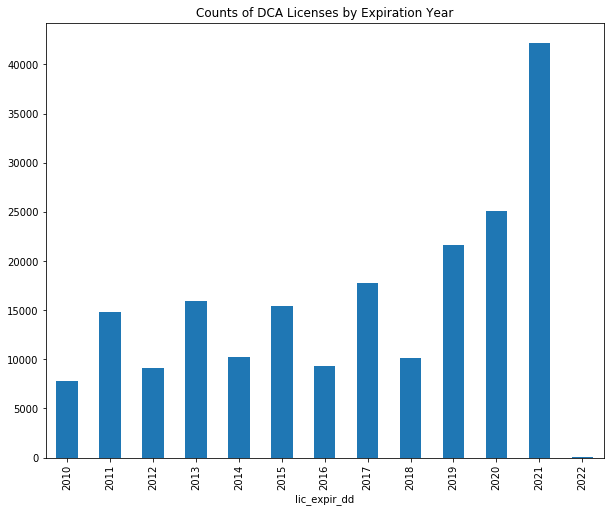

In [819]:
# df.groupby(df["lic_expir_dd"].dt.year).count()['license_nbr'].plot(kind="bar")
int_label_obj = df.groupby(df['lic_expir_dd'].dropna().dt.year).count()['license_nbr']
int_label_obj.index = int_label_obj.index.astype(int)
int_label_obj.plot(kind='bar',figsize=(10,8), title="Counts of DCA Licenses by Expiration Year")


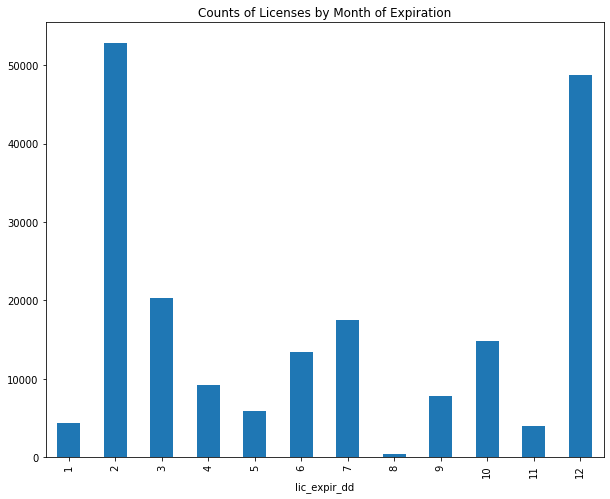

In [817]:
new_obj = df.groupby(df["lic_expir_dd"].dropna().dt.month).count()['license_nbr']
new_obj.index = new_obj.index.astype(int)
new_obj.plot(kind="bar",figsize=(10,8), title = "Counts of DCA Licenses by Month of Expiration")

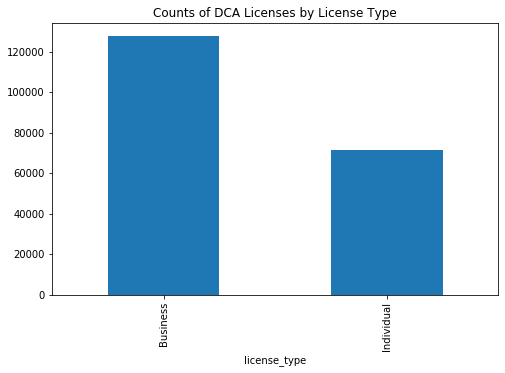

In [815]:
df.groupby(df['license_type']).count()['license_nbr'].plot(kind="bar",figsize=(8,5), title="Counts of DCA Licenses by License Type")

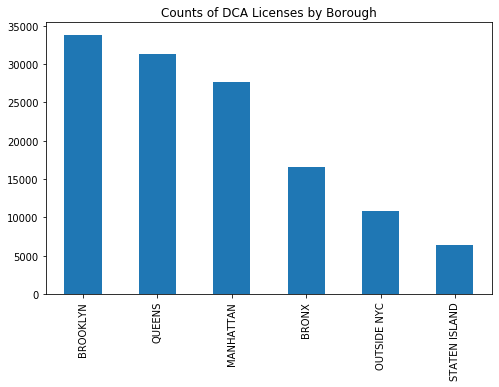

In [813]:
df['address_borough'].value_counts().plot(kind='bar',figsize=(8,5), title = "Counts of DCA Licenses by Borough")

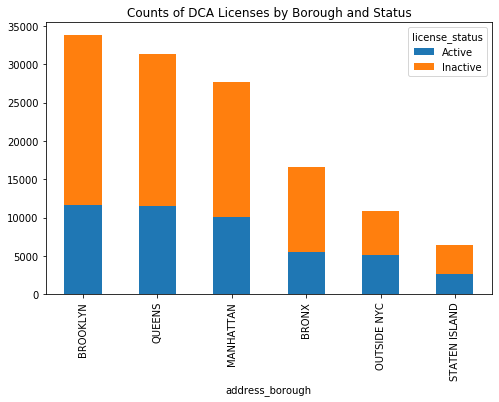

In [809]:
df.groupby(['address_borough','license_status'])['address_borough'].count()\
    .unstack('license_status')\
    .fillna(0)\
    .sort_values(by='Inactive',ascending=False)\
    .plot(kind="bar",stacked=True,figsize=(8,5),title="Counts of DCA Licenses by Borough and Status")

## Aggregated Industry Breakdown

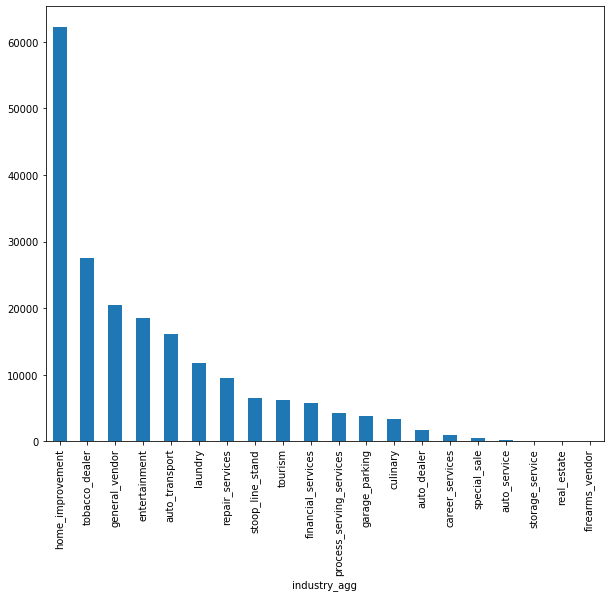

In [861]:
df.groupby('industry_agg').count()['license_nbr'].sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [793]:
industry_by_borough = df.groupby(['industry_agg','address_borough'])['industry_agg'].count().fillna(0)#.unstack('address_borough').fillna(0)
industry_by_borough_pct = industry_by_borough.groupby(level=0).apply(lambda x: 100*x / float(x.sum()))
print(industry_by_borough_pct)

industry_agg  address_borough
auto_dealer   BRONX              20.226730
              BROOKLYN           32.159905
              MANHATTAN           3.520286
              OUTSIDE NYC         0.059666
              QUEENS             36.515513
                                   ...    
tourism       BROOKLYN           24.000000
              MANHATTAN          46.000000
              OUTSIDE NYC        10.000000
              QUEENS             12.000000
              STATEN ISLAND       8.000000
Name: industry_agg, Length: 110, dtype: float64


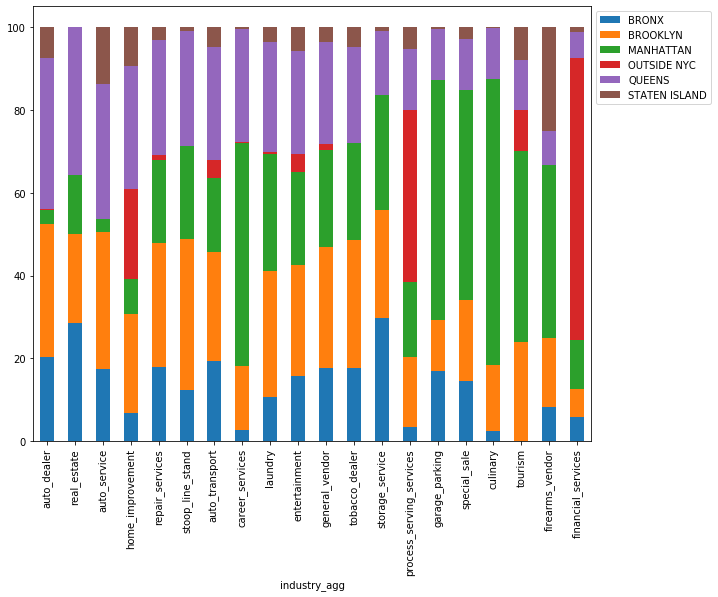

In [796]:
industry_by_borough_pct.unstack('address_borough').fillna(0)\
    .sort_values('QUEENS',ascending=False)\
    .plot(kind='bar',stacked=True,figsize=(10,8)).legend(bbox_to_anchor=(1,1))

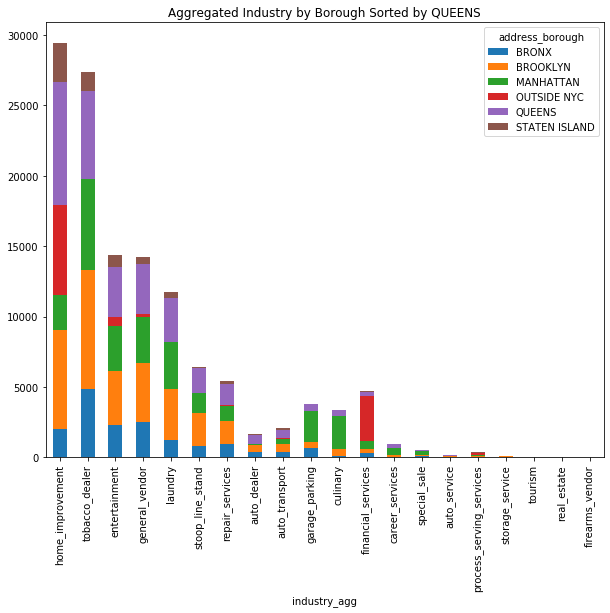

In [808]:
df.groupby(['industry_agg','address_borough'])['industry_agg'].count()\
    .unstack('address_borough')\
    .fillna(0)\
    .sort_values('QUEENS',ascending=False)\
    .plot(kind="bar",stacked=True,figsize=(10,8),title='Aggregated Industry by Borough Sorted by QUEENS')

### Tabular view of aggregated industry value counts

In [797]:
df.industry_agg.value_counts()

home_improvement            62211
tobacco_dealer              27454
general_vendor              20494
entertainment               18478
auto_transport              16108
laundry                     11780
repair_services              9508
stoop_line_stand             6449
tourism                      6220
financial_services           5774
process_serving_services     4251
garage_parking               3832
culinary                     3345
auto_dealer                  1680
career_services               942
special_sale                  503
auto_service                  166
storage_service               104
real_estate                    14
firearms_vendor                12
Name: industry_agg, dtype: int64

### Tabular view of original industry value counts

In [798]:
df.industry.value_counts()

Home Improvement Salesperson      32542
Home Improvement Contractor       29669
Tobacco Retail Dealer             24349
Secondhand Dealer - General       12376
Electronics Store                 10512
Tow Truck Driver                   7606
Stoop Line Stand                   6449
General Vendor                     6208
Sightseeing Guide                  6168
Pedicab Driver                     5969
Electronic & Appliance Service     5206
Laundries                          4417
Laundry                            4310
Locksmith                          4039
Debt Collection Agency             3985
Process Server Individual          3906
Ticket Seller                      3309
Electronic Cigarette Dealer        3105
Sidewalk Cafe                      3074
Laundry Jobber                     3053
Garage                             2499
Dealer In Products                 1893
Secondhand Dealer - Auto           1680
Amusement Device Portable          1525
Tow Truck Company                  1182


# 3. Location Analysis

Spatial-Density Analysis Approach to discover insights hidden in the location data across the features

### Create dataset containing only business licenses where lat/long coordinates are both present

In [834]:
locations = df[(~df.latitude.isna()) & (~df.longitude.isna())]\
            [['latitude','longitude','business_name','address_borough','industry_agg','industry']]\
            .reset_index(drop=True)
locations['lat_long'] = list(zip(locations.latitude, locations.longitude))


In [837]:
# locations.dtypes
locations.describe()

,latitude,longitude,business_name,address_borough,industry_agg,industry,lat_long
count,119651,119651,119637,118713,119651,119651,119651
unique,58954,58954,88979,6,20,47,58954
top,40.11238533659802,-77.51958437167269,T-MOBILE NORTHEAST LLC,BROOKLYN,tobacco_dealer,Home Improvement Contractor,"(40.11238533659802, -77.51958437167269)"
freq,6478,6478,591,33584,27401,24994,6478


In [838]:
locations.shape

(119651, 7)

### Filter out the data to only within the bounds of NYC

### Bounding box of new york city is taken from link below from nyc.gov

In [ ]:
# NYC city limits data 
# https://www1.nyc.gov/assets/planning/download/pdf/data-maps/open-data/nybb_metadata.pdf?ver=19d
# West -74.257159 East -73.699215
# North 40.915568 South 40.495992

In [839]:
locations['longitude'] = locations['longitude'].astype(float)
locations['latitude'] = locations['latitude'].astype(float)
nyc_limits = locations[(locations['longitude'] >= -74.257159) & (locations['longitude'] <= -73.699215) & \
                       (locations['latitude'] >= 40.495992) & (locations['latitude'] <= 40.915568)
                      ]

In [840]:
nyc_limits['address_borough'].unique()

array(['MANHATTAN', 'QUEENS', 'BROOKLYN', 'BRONX', 'STATEN ISLAND',
       'OUTSIDE NYC', None], dtype=object)

## Kernel Density Estimation

example and reference: https://www.iaos-isi.org/pdf/YSP/2013-1st-Martin,Ralphs.pdf

1. Raw point estimates can be difficult to understand across spatial visualization
2. Data summaries (such as the mean) can remove some spatial patterns of interest
3. KDE is a non-parametric method for summarizing data over one or more dimensions to estimate shape of density function and view underlying spatial trends in data


In [842]:
BBox = (nyc_limits.longitude.min(), nyc_limits.longitude.max(),
        nyc_limits.latitude.min(), nyc_limits.latitude.max())
print(BBox)

(-74.25376195520928, -73.70092927652794, 40.498737397467444, 40.9120628714794)


In [843]:
nyc_map = plt.imread('./522x515.png')

In [844]:
## Render the image with figsize set to native image size
dpi = plt.rcParams['figure.dpi']
# dpi = 96
# im_data = plt.imread(im_path)
height, width, depth = ruh_m.shape

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

### Map exported from https://www.openstreetmap.org/export#map=10/40.7051/-73.9771

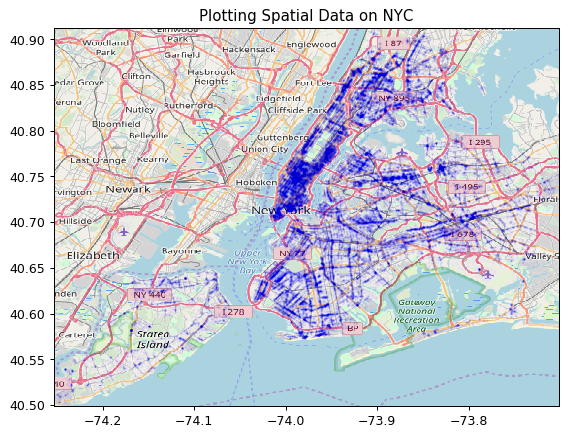

In [849]:
fig, ax = plt.subplots(figsize = figsize,dpi=dpi*1.25)
# fig,ax = plt.subplots()
# fig.set_size_inches(60,90)
ax.scatter(nyc_limits.longitude, nyc_limits.latitude, zorder=1, alpha= 0.02, c='b', s=1)
# ax = sns.kdeplot(nyc_limits['longitude'],nyc_limits['latitude'], cmap="Blues", shade=True, shade_lowest=False)
ax.set_title('Plotting Spatial Data on NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nyc_map, zorder=0, extent = BBox, aspect= 'equal')

### We can see some of the hot spots occurring in the raw points scatterplot over the map of NYC but cannot see any granular spatial patterns (other than the obvious fact that Manhattan has a high density)

### A simple KDE of the spatial lat/long coordinates generated in a 2D plane without the map shows other interesting patterns (shape similar to the outline of 5 boroughs)

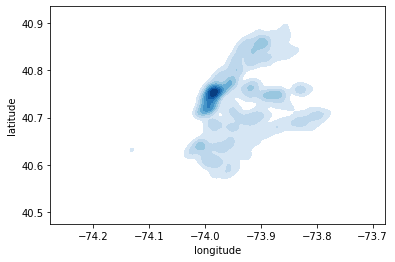

In [858]:
sns.kdeplot(nyc_limits['longitude'],nyc_limits['latitude'], cmap="Blues", shade=True, shade_lowest=False,figsize=(10,5))


### The KDE plotted over map of NYC shows spatial density patterns. 

1. This plot can be interpreted as such: the color intensity represents low to high probability (from the KDE's estimated probability density function) 
2. Adjusting the "h" bandwidth parameter can increase/decrease variance in fitting the KDE

### We can see hotspots occurring most prominently in 
1. Manhattan
2. Portions of the Bronx
3. Northern and Southern Brooklyn
4. Queens surrounding la guardia airport

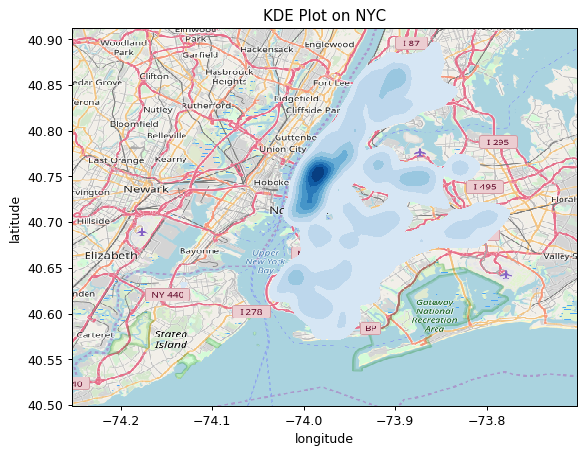

In [850]:
fig, ax = plt.subplots(figsize = figsize,dpi=dpi*1.25)
# ax.scatter(nyc_limits.longitude, nyc_limits.latitude, zorder=1, alpha= 0.02, c='b', s=1)
ax = sns.kdeplot(nyc_limits['longitude'],nyc_limits['latitude'], cmap="Blues", shade=True, shade_lowest=False)
ax.set_title('KDE Plot on NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nyc_map, zorder=0, extent = BBox, aspect= 'equal')

## Home Improvement Industry Spatial Density

### The same analysis of KDE is done on the subset of licenses for the aggregated industry feature equal to "HOME_IMPROVEMENT"

1. We should expect the most intense hotspots shift from the figure above -- it should closely resemble the largest shares from the stacked barplot showing aggregated industry by borough
2. As expected, we see from the figure below that the hotspots have shifted slightly towards Brooklyn and Queens (where most of the home_improvement subsets occur) and more specifically, which areas of the borough

In [853]:
home_improvement_subset = nyc_limits[nyc_limits['industry_agg']=='home_improvement']

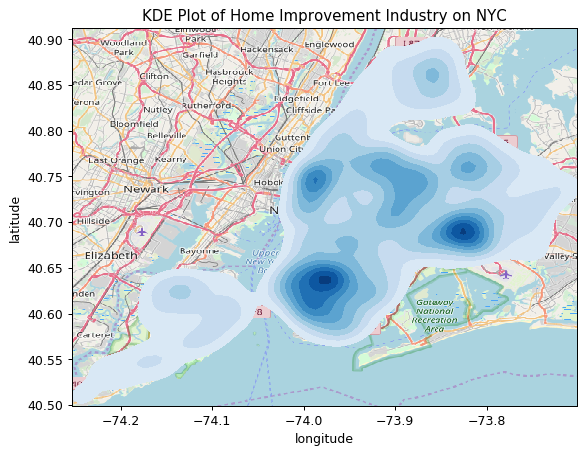

In [854]:
fig, ax = plt.subplots(figsize = figsize,dpi=dpi*1.25)
# ax.scatter(nyc_limits.longitude, nyc_limits.latitude, zorder=1, alpha= 0.02, c='b', s=1)
ax = sns.kdeplot(home_improvement_subset['longitude'],home_improvement_subset['latitude'], cmap="Blues", shade=True, shade_lowest=False)
ax.set_title('KDE Plot of Home Improvement Industry on NYC')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(nyc_map, zorder=0, extent = BBox, aspect= 'equal')

In [855]:
financial_services = nyc_limits[nyc_limits['industry_agg']=='financial_services']

## Outline of NYC Boroughs

In [851]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.worldatlas.com/upload/c6/23/73/shutterstock-152208935.jpg")